# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('processed_data.txt', sep=',')

Saving processed_data.txt to processed_data.txt


In [ ]:
df = df.drop(['Uniformity_Cell_Shape'], axis=1)

In [ ]:
# Train/test splitting
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:-1]
Y = df['Class']
(x_train,x_test,y_train,y_test) = train_test_split(X,Y,test_size=0.33, stratify=Y)

# Neural Network

In [ ]:
def create_model(layer1=5, layer2=5):
  np.random.seed(1)
  tf.random.set_seed(1)
  NN = keras.Sequential()
  # Hidden layer 1
  NN.add(keras.layers.Dense(3, input_dim = x_train.shape[1], activation='sigmoid'))
  # Hidden layer 2
  NN.add(keras.layers.Dense(3, activation='sigmoid'))
  # Output layer
  NN.add(keras.layers.Dense(1, activation='sigmoid'))
  NN.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
  return NN

In [ ]:
# Choosing hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model)
param_grid={'layer1':[3,6,9,12], 'layer2':[3,6,9,12]}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

14/14 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.3402


In [ ]:
(grid_result.best_score_, grid_result.best_params_)

(0.3399425268173218, {'layer1': 3, 'layer2': 3})

In [ ]:
NN1 = keras.Sequential()
# Hidden layer 1
NN1.add(keras.layers.Dense(3, input_dim = x_train.shape[1], activation='sigmoid'))
# Hidden layer 2
NN1.add(keras.layers.Dense(3, activation='sigmoid'))
# Output layer
NN1.add(keras.layers.Dense(1, activation='sigmoid'))
NN1.compile(loss='mse', 
            optimizer='adam',
            metrics=['accuracy', keras.metrics.Precision(name='Precision',thresholds=0.5), keras.metrics.Recall(name='Recall',thresholds=0.5)])

In [ ]:
# Training
result = NN1.fit(x_train, y_train, epochs=300, verbose=0)

In [ ]:
# Evaluation of model
training_stats = NN1.evaluate(x_train, y_train)
print('Loss: ' + str(training_stats[0]))
print('Accuracy: ' + str(training_stats[1]))
print('Training Precision: ' + str(training_stats[2]))
print('Training Recall: ' + str(training_stats[3]))

14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9772 - Precision: 0.9542 - Recall: 0.9799
Loss: 0.022014372050762177
Accuracy: 0.9771689772605896
Training Precision: 0.9542483687400818
Training Recall: 0.9798657894134521


In [ ]:
testing_stats = NN1.evaluate(x_test, y_test)
print('Loss: ' + str(testing_stats[0]))
print('Accuracy: ' + str(testing_stats[1]))
print('Testing Precision: ' + str(testing_stats[2]))
print('Testing Recall: ' + str(testing_stats[3]))

7/7 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9722 - Precision: 0.9474 - Recall: 0.9730
Loss: 0.024744514375925064
Accuracy: 0.9722222089767456
Testing Precision: 0.9473684430122375
Testing Recall: 0.9729729890823364


# Logistic Regression

In [ ]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
print('Training Score:', logReg.score(x_train, y_train))
print('Test Score:', logReg.score(x_test, y_test))

Training Score: 0.9726027397260274
Test Score: 0.9768518518518519


In [ ]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
y_pred = logReg.predict(np.array(x_train))
precision_training = precision_score(y_train,y_pred,average='macro',zero_division=0)
recall_training = recall_score(y_train,y_pred,average='macro',zero_division=0)
y_pred = logReg.predict(np.array(x_test))
precision_testing = precision_score(y_test,y_pred,average='macro',zero_division=0)
recall_testing = recall_score(y_test,y_pred,average='macro',zero_division=0)
print('Training Precision: ' + str(precision_training))
print('Training Recall: ' + str(recall_training))
print('Testing Precision: ' + str(precision_testing))
print('Testing Recall: ' + str(recall_testing))

Training Precision: 0.9694851489747103
Training Recall: 0.9694851489747103
Testing Precision: 0.9758118593735032
Testing Recall: 0.972687476208603


In [ ]:
#ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
y_pred = logReg.predict(np.array(df.iloc[:, 0:-1]))
y_true = df['Class']
roc_auc = roc_auc_score(y_true, y_pred, average='macro')
roc_auc

0.9705398853432939

In [ ]:
(false_positive_rate, true_positive_rate, threshold) = roc_curve(y_true, y_pred)

Text(0.5, 0, 'False Positive Rate')

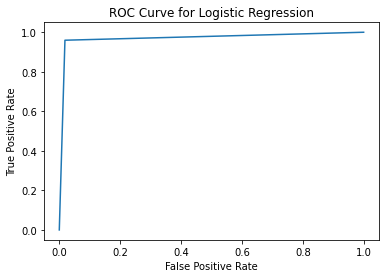

In [ ]:
# Plotting ROC curve
import matplotlib.pyplot as plt
plt.plot(false_positive_rate, true_positive_rate)
plt.title('ROC Curve for Logistic Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Decision Tree

In [ ]:
from sklearn import tree
model3 = tree.DecisionTreeClassifier()
model3 = model3.fit(X, Y)
y_pred = model3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
testing_accuracy = accuracy_score(y_test, y_pred)
testing_accuracy

1.0

In [ ]:
precision_testing = precision_score(y_test,y_pred,average='macro',zero_division=0)
recall_testing = recall_score(y_test,y_pred,average='macro',zero_division=0)
print('Testing Precision: ' + str(precision_testing))
print('Testing Recall: ' + str(recall_testing))

Testing Precision: 1.0
Testing Recall: 1.0
